<font face="verdana"> 
1. Download dataset titanic (891x 12) from kaggle.com web site.<br>
2. Read dataset in python environment. <br>

In [1]:
import pandas as pd
titanic = pd.read_excel("titanic3.xls")
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


<font face="verdana"> 3. Print all the statistical data for all the numeric columns of dataset titanic. <br>

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<font face="verdana">4. Data cleaning: Analyse the column <b> ‘Age’ </b >and fix NULL values with mean age.

In [3]:
titanic['age'].fillna(titanic['age'].mean(),inplace = True)

<font face="verdana">5. Data Binning : Create a extra column <b> ‘Age Group’</b> by using binning concept. Use the following table for creating category.<br>
  •  Child - 0 to 12 <br>
  •  Adolescence 13 to 18 <br>
  •  Adult - 19 to 40 <br>
  •  Middle Age 41 to 60 <br>
  •  Senior 61 to 75 <br>
  •  Very Senior 76 and above <br>

In [4]:
age2 = pd.qcut((titanic['age']), q=[0,0.0764,0.14,0.831459,0.9752,0.9991,1] ,labels =['Child','Adolescence','Adult','Middle Age','Senior','Very Senior'],duplicates = 'drop')

In [5]:
age2

0             Adult
1             Child
2             Child
3             Adult
4             Adult
           ...     
1304    Adolescence
1305          Adult
1306          Adult
1307          Adult
1308          Adult
Name: age, Length: 1309, dtype: category
Categories (6, object): [Child < Adolescence < Adult < Middle Age < Senior < Very Senior]

In [6]:
age100 = pd.DataFrame({'age': titanic['age'], 'Age_class':age2})

In [7]:
from tabulate import tabulate
print(tabulate(age100,headers='keys',tablefmt="github"))

|      |     age | Age_class   |
|------|---------|-------------|
|    0 | 29      | Adult       |
|    1 |  0.9167 | Child       |
|    2 |  2      | Child       |
|    3 | 30      | Adult       |
|    4 | 25      | Adult       |
|    5 | 48      | Middle Age  |
|    6 | 63      | Senior      |
|    7 | 39      | Adult       |
|    8 | 53      | Middle Age  |
|    9 | 71      | Senior      |
|   10 | 47      | Middle Age  |
|   11 | 18      | Adolescence |
|   12 | 24      | Adult       |
|   13 | 26      | Adult       |
|   14 | 80      | Very Senior |
|   15 | 29.8811 | Adult       |
|   16 | 24      | Adult       |
|   17 | 50      | Middle Age  |
|   18 | 32      | Adult       |
|   19 | 36      | Adult       |
|   20 | 37      | Adult       |
|   21 | 47      | Middle Age  |
|   22 | 26      | Adult       |
|   23 | 42      | Middle Age  |
|   24 | 29      | Adult       |
|   25 | 25      | Adult       |
|   26 | 25      | Adult       |
|   27 | 19      | Adult       |
|   28 | 3

In [8]:
age100['Age_class'].value_counts()

Adult          903
Middle Age     180
Child          107
Adolescence     86
Senior          31
Very Senior      2
Name: Age_class, dtype: int64

In [9]:
import numpy as np
np.quantile(titanic['age'],0.14)

18.0

<font face="verdana">6. Data Visualization : <br>
a. Passenger survived vs Gender of passengers

In [10]:
gender = titanic.groupby('sex')

#FEMALE
gender_female = gender.get_group('female')
print('No of Female :',gender_female['sex'].count())
print('No of Female survived :',gender_female['survived'].sum())
xx = (gender_female['sex'].count() - gender_female['survived'].sum())
print('No of Female NOT Survived :',xx)


#MALE
gender_male = gender.get_group('male')
print('\nNo of male:',gender_male['sex'].count())
print('No of male survived :',gender_male['survived'].sum())
xy =(gender_male['sex'].count() - gender_male['survived'].sum())
print('No of male NOT Survived :',xy)

No of Female : 466
No of Female survived : 339
No of Female NOT Survived : 127

No of male: 843
No of male survived : 161
No of male NOT Survived : 682


In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Gender',fontsize = 10)
ax.set_ylabel('Survived',fontsize = 10)
ax.set_title('Gender v/s Survived',fontsize = 10)

bars = ['Female','Male']
height = (gender_female['survived'].sum(), gender_male['survived'].sum())
color = ['#DC7633','#85929E']

plt.ylim(0,400)
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

for y_pos, height,color in zip(y_pos, height,color):
    plt.bar(y_pos, height, color =color)

plt.legend(bars)
plt.show()

<Figure size 500x500 with 1 Axes>

<font face="verdana">b. Passengers survived and not survived.

In [12]:
titanic['survived'].value_counts()
z = list(titanic['survived'])

x = z.count(0)
print('No of people Survived : ',x)

y = z.count(1)
print('No of people Survived : ',y)

No of people Survived :  809
No of people Survived :  500


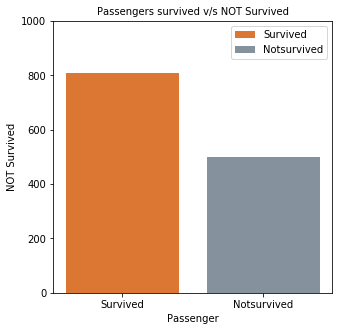

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Passenger',fontsize = 10)
ax.set_ylabel('NOT Survived',fontsize = 10)
ax.set_title('Passengers survived v/s NOT Survived',fontsize = 10)

bars = ['Survived','Notsurvived']
height = (x,y)
color = ['#DC7633','#85929E']

plt.ylim(0,1000)
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

for y_pos, height,color in zip(y_pos, height,color):
    plt.bar(y_pos, height, color =color)
plt.legend(bars)
plt.show()

<font face="verdana">c. No.of passenger boarded from each port of embarkation

In [14]:
pclass = titanic.groupby('pclass')
pclass_1 = pclass.get_group(1)
print('Total of  pclass 1  : ',pclass_1['pclass'].count())
p1 = pclass_1['survived'].sum()
print('Total no of pclass survived ',p1)


pclass_2 = pclass.get_group(2)
print('\nTotal of  pclass 2  : ',pclass_2['pclass'].count())
p2 = pclass_2['survived'].sum()
print('Total no of pclass survived ',p2)


pclass_3 = pclass.get_group(3)
print('\nTotal of  pclass 3  : ',pclass_3['pclass'].count())
p3 = pclass_3['survived'].sum()
print('Total no of pclass survived ',p3)

Total of  pclass 1  :  323
Total no of pclass survived  200

Total of  pclass 2  :  277
Total no of pclass survived  119

Total of  pclass 3  :  709
Total no of pclass survived  181


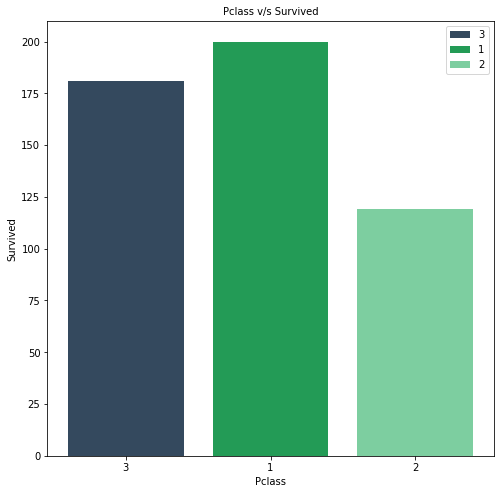

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Pclass',fontsize = 10)
ax.set_ylabel('Survived',fontsize = 10)
ax.set_title('Pclass v/s Survived',fontsize = 10)

bars = ['3','1','2']
height = (p3,p1,p2)
color =['#34495E','#239B56','#7DCEA0']

plt.ylim(0,210)
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

for y_pos, height,color in zip(y_pos, height,color):
    plt.bar(y_pos, height, color =color)
plt.legend(bars)
plt.show()


<font face="verdana">d. Box Plot for age of passenger. Explain Q1,Q2 and Q3

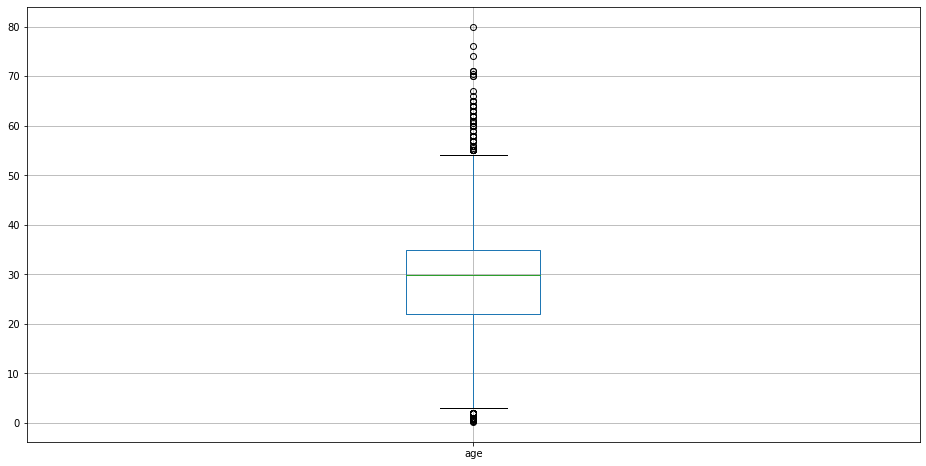

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
titanic.boxplot(column ='age')

In [17]:
import numpy as np
Q1 = np.quantile(titanic['age'],0.25)
Q2 = np.quantile(titanic['age'],0.50)
Q3 = np.quantile(titanic['age'],0.75)

print('Q1 : ',Q1,'\nQ2 : %2.4f  '%Q2,'\nQ3 : ',Q3,)

Q1 :  22.0 
Q2 : 29.8811   
Q3 :  35.0


(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

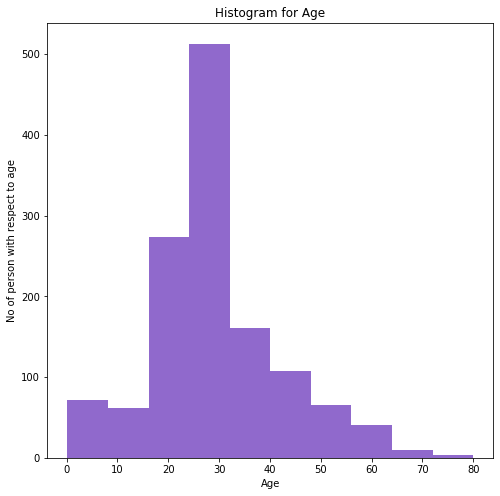

In [18]:
fig = plt.figure(figsize=(8,8))
plt.title('Histogram for Age')
plt.ylabel('No of person with respect to age')
plt.xlabel('Age')
plt.hist(titanic['age'],color = '#9069CC')

<font face="verdana"> 7. Data Outliers: <br>
a. Calculate the limits of mild & extreme outliers for the age

In [19]:
IQR=Q3-Q1

#MILD OUTLIER

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

print('Lower limit :',lower)
print('Upper limit :',upper)


Lower limit : 2.5
Upper limit : 54.5


In [20]:
outlier= titanic[(titanic['age'] < lower) | (titanic['age'] > upper )]
#print(outlier.head())
#outlier.value_counts()
print('MILD OUTLIER')
print(outlier['age'])
print(type(outlier))

MILD OUTLIER
1        0.9167
2        2.0000
6       63.0000
9       71.0000
14      80.0000
         ...   
1225    60.5000
1230     2.0000
1235    74.0000
1240     0.4167
1261    63.0000
Name: age, Length: 101, dtype: float64
<class 'pandas.core.frame.DataFrame'>


In [21]:
#Extreme OUTLIER

lower_ex=Q1-(3*IQR)
upper_ex=Q3+(3*IQR)

print('Lower limit : ',lower_ex)
print('Upper limit : ',upper_ex)

Lower limit :  -17.0
Upper limit :  74.0


In [22]:
outlier_ex= titanic[(titanic['age'] < lower_ex) | (titanic['age'] > upper_ex )]
#print(outlier.head())
#outlier.value_counts()
print('Extreme OUTLIER')
print(outlier_ex['age'])
print(type(outlier))

Extreme OUTLIER
14    80.0
61    76.0
Name: age, dtype: float64
<class 'pandas.core.frame.DataFrame'>


In [23]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<font face="verdana"> 8.Data Out layers: <br>
a. Calculate lower and upper limit of out layers data points as THREE sigma imits. <br>

In [24]:
print('MEAN',titanic['age'].mean())
print('Std Dev',titanic['age'].std())

MEAN 29.881134512428055
Std Dev 12.883199043445334


In [25]:
upper_z1 = titanic['age'].mean() + 3*titanic['age'].std()
lower_z2 = titanic['age'].mean() - 3*titanic['age'].std()
print('Lower',lower_z2)
print('Upper',upper_z1)

Lower -8.76846261790795
Upper 68.53073164276407


In [26]:
outlier_z= titanic[(titanic['age'] < lower_z2) | (titanic['age'] > upper_z1 )]

In [27]:
print('OUTLIER')
print(outlier_z['age'])
print(type(outlier_z))
outlier_z.shape

OUTLIER
9       71.0
14      80.0
61      76.0
81      70.0
135     71.0
506     70.0
727     70.5
1235    74.0
Name: age, dtype: float64
<class 'pandas.core.frame.DataFrame'>


(8, 14)

<font face="verdana">b. Check if points fall outside this limit and drop them.<br>

In [28]:
titanic.shape

(1309, 14)

In [29]:
titanic = titanic.drop(outlier_z.index, axis = 0).reset_index(drop=True)

In [30]:
titanic.shape

(1301, 14)

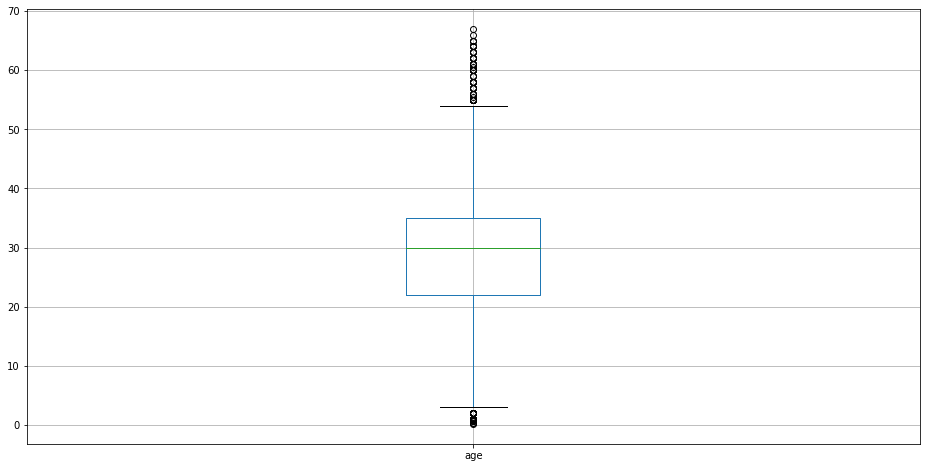

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
titanic.boxplot(column ='age')

In [32]:
#dropping Extreme outliers :
outlier_ex= titanic[(titanic['age'] < lower_ex) | (titanic['age'] > upper_ex )]
titanic = titanic.drop(outlier_ex.index, axis = 0).reset_index(drop=True)

In [33]:
#dropping Mild outliers :
outlier= titanic[(titanic['age'] < lower) | (titanic['age'] > upper )]
titanic = titanic.drop(outlier.index, axis = 0).reset_index(drop=True)

In [34]:
titanic.shape

(1208, 14)

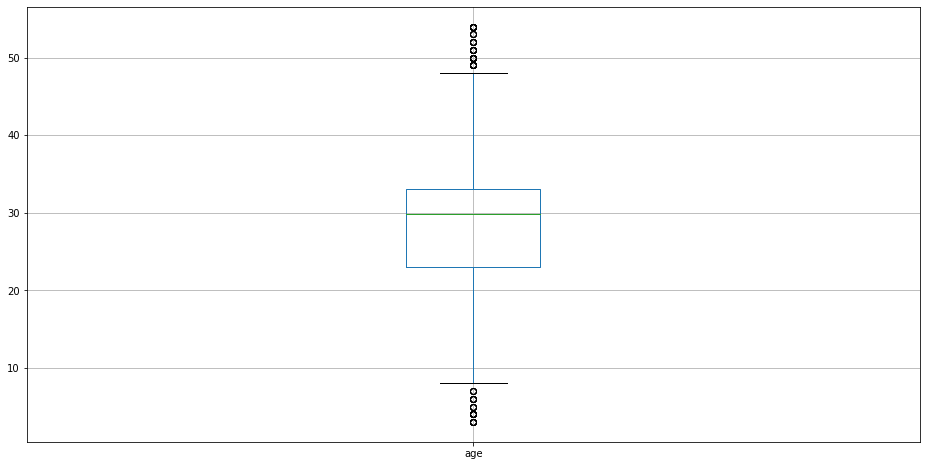

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
titanic.boxplot(column ='age')

<h2><font face="verdana" color ="#F57523">  4 January 2020

<font face="verdana"> Encoding

In [36]:
#Example of encoding
from sklearn import preprocessing

#create the lalbelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
encoded_values = le.fit_transform(titanic['sex'])
print(encoded_values)

#titanic['embarked'] = le.fit_transform(titanic['embarked'])
#titanic

[0 1 0 ... 1 1 1]


In [37]:
#creating dummies
new_owners = pd.get_dummies(titanic['sex'])
print(new_owners)
new_owners2 = pd.concat([titanic,new_owners],axis =1)
new_owners2

      female  male
0          1     0
1          0     1
2          1     0
3          0     1
4          0     1
...      ...   ...
1203       1     0
1204       1     0
1205       0     1
1206       0     1
1207       0     1

[1208 rows x 2 columns]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,female,male
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",0,1
4,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0
1204,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0
1205,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1
1206,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1


In [38]:
new_owners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 2 columns):
female    1208 non-null uint8
male      1208 non-null uint8
dtypes: uint8(2)
memory usage: 2.5 KB


In [39]:
#creating dummies
new_owners = pd.get_dummies(titanic['embarked'])
print(new_owners)
new_owners = pd.concat([new_owners2,new_owners],axis =1)
new_owners

      C  Q  S
0     0  0  1
1     0  0  1
2     0  0  1
3     0  0  1
4     0  0  1
...  .. .. ..
1203  1  0  0
1204  1  0  0
1205  1  0  0
1206  1  0  0
1207  0  0  1

[1208 rows x 3 columns]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,female,male,C,Q,S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,0,0,1
1,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
2,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,1
3,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",0,1,0,0,1
4,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0,1,0,0
1204,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0,1,0,0
1205,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1,1,0,0
1206,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1,1,0,0


In [40]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

X = pd.DataFrame(new_owners[['pclass','male','female','age','sibsp','parch','fare','C','Q','S']])
y= pd.DataFrame(new_owners['survived'])


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [42]:
print("X dimension", X.shape)
print("X_train dimension",X_train.shape)
print("X_test dimension",X_test.shape)

print("Y dimension", y.shape)
print("y_train dimension",y_train.shape)
print("y_test dimension",y_test.shape)

X dimension (1208, 10)
X_train dimension (966, 10)
X_test dimension (242, 10)
Y dimension (1208, 1)
y_train dimension (966, 1)
y_test dimension (242, 1)


In [43]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('coeficent',lm.coef_)
print('Intercept',lm.intercept_)
print('R square',lm.score(X,y))

coeficent [[-0.14951357 -0.24793794  0.24793794 -0.0046593  -0.03859682 -0.0084322
   0.00039207 -0.03537711 -0.10193828 -0.12475242]]
Intercept [1.0472636]
R square 0.3710180461402498


In [44]:
#Now using logistic regression on training data
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

cla_log = LogisticRegression()
cla_log.fit(X_train,y_train)

C:\Users\Asus 1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus 1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred = cla_log.predict(X_test)
print('y_pred : ',y_pred)

y_pred :  [1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0]


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[135  22]
 [ 37  48]]


In [47]:
#accuracy
metrics.accuracy_score(y_test,y_pred)

0.756198347107438

<h2><font face="verdana" color ="#CA99EE">  06 January 2020

In [48]:
y_predict = cla_log.predict(X_test)
y_predict1 = cla_log.predict_proba(X_test)
print(y_predict)
print(y_predict1)

[1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0]
[[0.37131042 0.62868958]
 [0.28460783 0.71539217]
 [0.74744683 0.25255317]
 [0.79853682 0.20146318]
 [0.76371665 0.23628335]
 [0.77271491 0.22728509]
 [0.17732398 0.82267602]
 [0.83931571 0.16068429]
 [0.33460426 0.66539574]
 [0.63874498 0.36125502]
 [0.82496335 0.17503665]
 [0.18409486 0.81590514]
 [0.95694991 0.04305009]
 [0.87870458 0.12129542]
 [0.89962795 0.10037205]
 [0.96070976 0.03929024]
 [0.17298413 0.82701587]
 [0.64155226 0.35844774]
 [0.75791271 0.24208729]
 [0.29775171 0.70224829]
 [0.9916

In [49]:
titanic_1 = pd.read_excel('titanic4.xls')

In [50]:
titanic_1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat
0,3,0,"Johansson, Mr. Erik",female,22.00,0,0,350052,7.7958,S,NaN
1,3,0,"Johansson, Mr. Erik",male,22.00,0,0,350052,7.7958,S,NaN
2,3,0,"Augustsson, Mr. Albert",male,23.00,0,0,347468,7.8542,S,NaN
3,3,1,"Ayoub, Miss. Banoura",female,13.00,0,0,2687,7.2292,C,C
4,3,0,"Baccos, Mr. Raffull",male,20.00,0,0,2679,7.2250,C,NaN
5,3,0,"Backstrom, Mr. Karl Alfred",male,32.00,1,0,3101278,15.8500,S,D
6,3,1,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,S,NaN
7,3,1,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C,C
8,3,1,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C,C
9,3,1,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,C,C


In [51]:
#Example of encoding
from sklearn import preprocessing

#create the lalbelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
encoded_values = le.fit_transform(titanic_1['sex'])
print(encoded_values)

titanic_1['sex'] = le.fit_transform(titanic_1['sex'])
titanic_1

[0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat
0,3,0,"Johansson, Mr. Erik",0,22.00,0,0,350052,7.7958,S,NaN
1,3,0,"Johansson, Mr. Erik",1,22.00,0,0,350052,7.7958,S,NaN
2,3,0,"Augustsson, Mr. Albert",1,23.00,0,0,347468,7.8542,S,NaN
3,3,1,"Ayoub, Miss. Banoura",0,13.00,0,0,2687,7.2292,C,C
4,3,0,"Baccos, Mr. Raffull",1,20.00,0,0,2679,7.2250,C,NaN
5,3,0,"Backstrom, Mr. Karl Alfred",1,32.00,1,0,3101278,15.8500,S,D
6,3,1,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",0,33.00,3,0,3101278,15.8500,S,NaN
7,3,1,"Baclini, Miss. Eugenie",0,0.75,2,1,2666,19.2583,C,C
8,3,1,"Baclini, Miss. Helene Barbara",0,0.75,2,1,2666,19.2583,C,C
9,3,1,"Baclini, Miss. Marie Catherine",0,5.00,2,1,2666,19.2583,C,C


In [52]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

X = pd.DataFrame(titanic_1['sex'])
y= pd.DataFrame(titanic_1['survived'])


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4,random_state = 0)

In [54]:
print("X dimension", X.shape)
print("X_train dimension",X_train.shape)
print("X_test dimension",X_test.shape)

print("\nY dimension", y.shape)
print("y_train dimension",y_train.shape)
print("y_test dimension",y_test.shape)

X dimension (42, 1)
X_train dimension (25, 1)
X_test dimension (17, 1)

Y dimension (42, 1)
y_train dimension (25, 1)
y_test dimension (17, 1)


In [55]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('coeficent',lm.coef_)
print('Intercept',lm.intercept_)
print('R square',lm.score(X,y))

coeficent [[-0.05176471]]
Intercept [0.41176471]
R square 0.0027375565610860964


In [56]:
#Now using logistic regression on training data
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

cla_log = LogisticRegression()
cla_log.fit(X_train,y_train)

C:\Users\Asus 1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus 1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = cla_log.predict(X_test)
print('y_pred : ',y_pred)

y_pred :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [58]:
y_pred.shape

(17,)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10  0]
 [ 7  0]]


In [60]:
#accuracy
metrics.accuracy_score(y_test,y_pred)

0.5882352941176471

In [61]:
y_predict = cla_log.predict(X_test)
y_predict1 = cla_log.predict_proba(X_test)
print(y_predict)
print(y_predict1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.67949311 0.32050689]
 [0.67949311 0.32050689]
 [0.67949311 0.32050689]
 [0.67949311 0.32050689]
 [0.56570452 0.43429548]
 [0.56570452 0.43429548]
 [0.67949311 0.32050689]
 [0.56570452 0.43429548]
 [0.67949311 0.32050689]
 [0.67949311 0.32050689]
 [0.67949311 0.32050689]
 [0.67949311 0.32050689]
 [0.56570452 0.43429548]
 [0.67949311 0.32050689]
 [0.56570452 0.43429548]
 [0.67949311 0.32050689]
 [0.56570452 0.43429548]]


##<h2><font face="verdana" color ="#CA59EE"> 10 January - SVM

In [62]:
new_owners

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,female,male,C,Q,S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,0,0,1
1,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
2,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,1
3,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",0,1,0,0,1
4,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0,1,0,0
1204,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0,1,0,0
1205,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1,1,0,0
1206,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1,1,0,0


In [63]:
new_owners.to_csv('New_Titanic.csv')

In [64]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [65]:
titanic4 = pd.read_csv('New_Titanic.csv')

In [66]:
titanic4

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,female,male,C,Q,S
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,0,0,1
1,1,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
2,2,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,1
3,3,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",0,1,0,0,1
4,4,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1203,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0,1,0,0
1204,1204,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0,1,0,0
1205,1205,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1,1,0,0
1206,1206,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1,1,0,0


In [67]:
titanic4.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,female,male,C,Q,S
count,1208.00000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,105.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000
mean,603.50000,2.334437,0.377483,28.944320,0.480960,0.357616,31.430277,158.647619,0.354305,0.645695,0.201987,0.096854,0.700331
std,348.86387,0.823680,0.484958,9.971955,1.039231,0.857498,48.964258,97.336745,0.478500,0.478500,0.401649,0.295882,0.458303
min,0.00000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,301.75000,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,603.50000,3.000000,0.000000,29.881135,0.000000,0.000000,13.500000,149.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,905.25000,3.000000,1.000000,33.000000,1.000000,0.000000,30.000000,255.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1207.00000,3.000000,1.000000,54.000000,8.000000,9.000000,512.329200,328.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
titanic4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 20 columns):
Unnamed: 0    1208 non-null int64
pclass        1208 non-null int64
survived      1208 non-null int64
name          1208 non-null object
sex           1208 non-null object
age           1208 non-null float64
sibsp         1208 non-null int64
parch         1208 non-null int64
ticket        1208 non-null object
fare          1208 non-null float64
cabin         250 non-null object
embarked      1207 non-null object
boat          443 non-null object
body          105 non-null float64
home.dest     667 non-null object
female        1208 non-null int64
male          1208 non-null int64
C             1208 non-null int64
Q             1208 non-null int64
S             1208 non-null int64
dtypes: float64(3), int64(10), object(7)
memory usage: 188.9+ KB


In [69]:
X = pd.DataFrame(titanic4[['pclass','age', 'sibsp','parch', 'fare','female', 'male', 'C', 'Q', 'S']])
y = pd.DataFrame(titanic4['survived'])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 10)

In [71]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf', gamma = 'auto', degree = 4)
model.fit(X_train, y_train.values.ravel())
expected = y_test
predicted  = model.predict(X_test)
print(metrics.classification_report(expected,predicted))
#print(metrics.confusion_matrix((expected,predicted)))

from sklearn.metrics import accuracy_score
accur = accuracy_score(expected,predicted)
print('Test Accuracy :{:.6f}'.format(accur))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       161
           1       0.56      0.59      0.57        81

    accuracy                           0.71       242
   macro avg       0.67      0.68      0.68       242
weighted avg       0.71      0.71      0.71       242

Test Accuracy :0.706612


In [72]:
#Creating our Naive Bayes Model using Sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
model = GaussianNB()
model.fit(X_train,y_train.values.ravel())
#making prediction 
expected = y_test
predicted  = model.predict(X_test)
print(metrics.classification_report(expected,predicted))
#print(metrics.confusion_matrix((expected,predicted)))

from sklearn.metrics import accuracy_score
accur = accuracy_score(expected,predicted)
print('Test Accuracy :{:.6f}'.format(accur))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       161
           1       0.70      0.75      0.73        81

    accuracy                           0.81       242
   macro avg       0.79      0.80      0.79       242
weighted avg       0.81      0.81      0.81       242

Test Accuracy :0.809917


In [76]:
from sklearn import svm
model = svm.SVC(kernel = 'linear', gamma = 'scale', degree = 4)
model.fit(X_train, y_train.values.ravel())
expected = y_test
predicted  = model.predict(X_test)
#print(metrics.classification_report(expected,predicted))
#print(metrics.confusion_matrix((expected,predicted)))

from sklearn.metrics import accuracy_score
accur = accuracy_score(expected,predicted)
print('Test Accuracy :{:.6f}'.format(accur))

Test Accuracy :0.780992


In [74]:
from sklearn import svm
model = svm.SVC(kernel = 'poly', gamma = 'scale', degree = 3)
model.fit(X_train, y_train.values.ravel())
expected = y_test
predicted  = model.predict(X_test)
#print(metrics.classification_report(expected,predicted))
#print(metrics.confusion_matrix((expected,predicted)))

from sklearn.metrics import accuracy_score
accur = accuracy_score(expected,predicted)
print('Test Accuracy :{:.6f}'.format(accur))

Test Accuracy :0.694215


In [75]:
from sklearn import svm
model = svm.SVC(kernel = 'sigmoid', gamma = 'auto', degree = 3)
model.fit(X_train, y_train.values.ravel())
expected = y_test
predicted  = model.predict(X_test)
#print(metrics.classification_report(expected,predicted))
#print(metrics.confusion_matrix((expected,predicted)))

from sklearn.metrics import accuracy_score
accur = accuracy_score(expected,predicted)
print('Test Accuracy :{:.6f}'.format(accur))

Test Accuracy :0.665289
